# Produce a surf report

The `SurfReport` object features additional reporting functionalities, such as plotting methods and easily readable surf reports.

In [1]:
from pysurfline import SurfReport

List of known spot id

| Spot Id | Name |
|---|---|
| 5842041f4e65fad6a7708890 | Pipeline (USA)|
| 584204204e65fad6a7709b09 | Varazze (ITA)|
| 5842041f4e65fad6a7708b4b | Uluwatu (IDN)
| 5842041f4e65fad6a7708c8e | La Graviere (FRA)|

Initializing a `SurfReport` objects does nothing else than calling a `SpotForecast` object with the specified `params` for requesting the desired response data by the Surfline API. 

In [2]:
params = {
    "spotId": "5842041f4e65fad6a7708890",
    "days": 3,
    "intervalHours": 3,
}
report = SurfReport(params)
report.api_log


['ForecastGetter(Type:wave, Status:200)',
 'ForecastGetter(Type:wind, Status:200)',
 'ForecastGetter(Type:tides, Status:200)',
 'ForecastGetter(Type:weather, Status:200)']

With respect to the `SpotForecast` objects, that stores separately all the raw response data as class attributes, the `SurfReport` object has the additional `df` attribute to easily inspect all the hourly data fetched from the Surfline servers merged into a readable `pandas.DataFrame` object.

In [3]:
report.df.head()

utcOffset  surf_min  surf_max  surf_optimalScore  \
timestamp                                                               
2022-03-15 10:00:00        -10  2.043341  2.933365                  2   
2022-03-15 13:00:00        -10  1.922824  2.624094                  2   
2022-03-15 16:00:00        -10  1.852306  2.484824                  2   
2022-03-15 19:00:00        -10  1.861400  2.439367                  2   
2022-03-15 22:00:00        -10  1.905300  2.435817                  2   

                            surf_humanRelation  \
timestamp                                        
2022-03-15 10:00:00                2x overhead   
2022-03-15 13:00:00        Head to 2x overhead   
2022-03-15 16:00:00  Overhead to well overhead   
2022-03-15 19:00:00  Overhead to well overhead   
2022-03-15 22:00:00  Overhead to well overhead   

                                                                swells  \
timestamp                                                                
2022-03-15 10:00:00  [{'height': 0.89608, 'period': 8, 'direction':...   
2022-03-15 13:00:00  [{'height': 0.88719, 'period': 8, 'direction':...   
2022-03-15 16:00:00  [{'height': 0.8673, 'period': 8, 'direction': ...   
2022-03-15 19:00:00  [{'height': 0.85874, 'period': 8, 'direction':...   
2022-03-15 22:00:00  [{'height': 0.80098, 'period': 8, 'direction':...   

                     utcOffset     speed  direction directionType      gust  \
timestamp                                                                     
2022-03-15 10:00:00        -10  25.03418  103.28472      Offshore  27.72000   
2022-03-15 13:00:00        -10  22.08038  104.44661      Offshore  24.84019   
2022-03-15 16:00:00        -10  22.43641  101.48412      Offshore  23.47987   
2022-03-15 19:00:00        -10  22.76464  102.58955      Offshore  23.40507   
2022-03-15 22:00:00        -10  20.79936   94.59084      Offshore  20.79936   

                     optimalScore  utcOffset  temperature     condition  
timestamp                                                                
2022-03-15 10:00:00             2        -10     23.64603   NIGHT_CLEAR  
2022-03-15 13:00:00             2        -10     22.88248  NIGHT_CLOUDY  
2022-03-15 16:00:00             2        -10     23.21231   NIGHT_CLEAR  
2022-03-15 19:00:00             2        -10     23.25000         CLEAR  
2022-03-15 22:00:00             2        -10     23.95001         CLEAR

Moreover, a simplified version of the dataframe is available with the `surf` attribute. This represents the surf data that is actually plotted.

In [4]:
report.surf.head()

surf_min  surf_max     speed directionType  direction
timestamp                                                                 
2022-03-15 10:00:00  2.043341  2.933365  25.03418      Offshore  103.28472
2022-03-15 13:00:00  1.922824  2.624094  22.08038      Offshore  104.44661
2022-03-15 16:00:00  1.852306  2.484824  22.43641      Offshore  101.48412
2022-03-15 19:00:00  1.861400  2.439367  22.76464      Offshore  102.58955
2022-03-15 22:00:00  1.905300  2.435817  20.79936      Offshore   94.59084

Lets then call the `plot()` method, that returns a `matplotlib` figure representing the minimum and maximum **surf size** that is forecasted for the spot.

**Daylight hours** are shown in the plot, with darkgrey representing night and lightgrey representing dusk and dawn.

**Wind speed and direction** is annotated at the top.

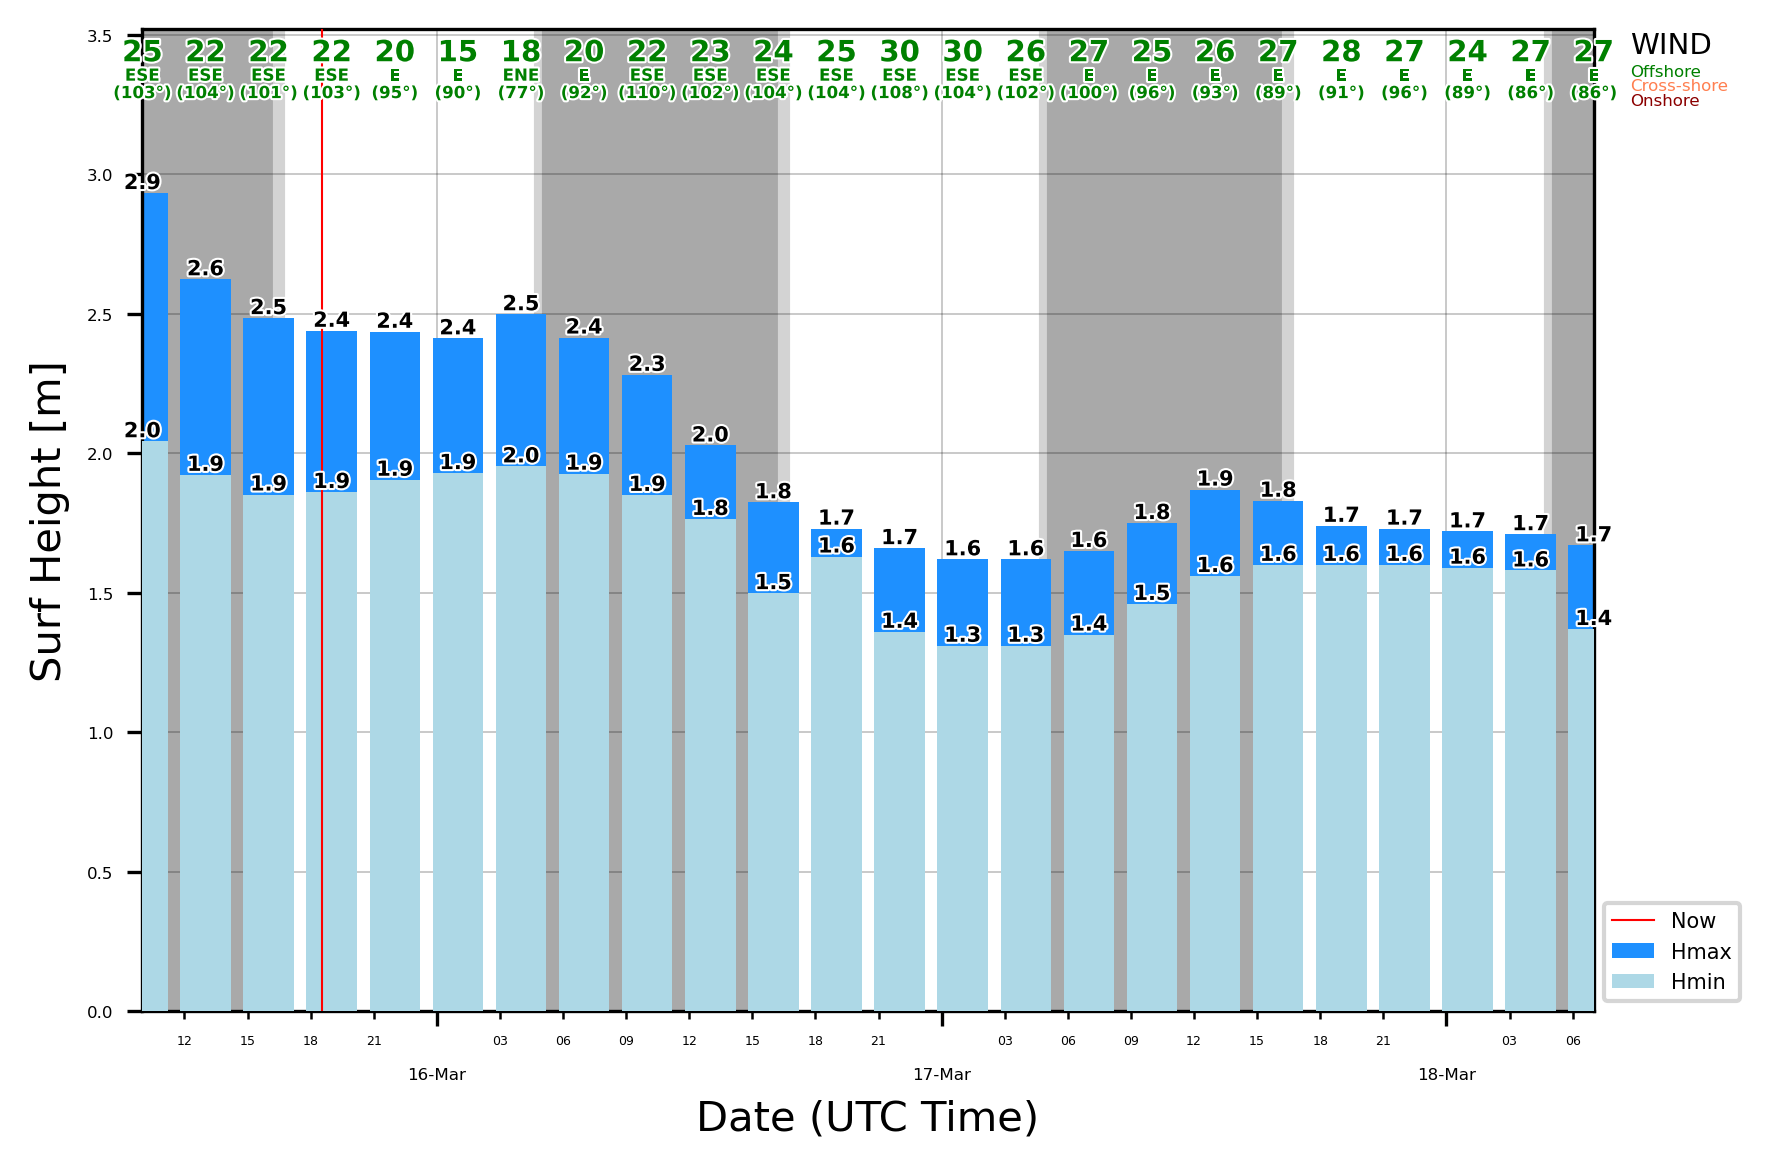

In [5]:
f=report.plot()
f.savefig("../images/surfreport_pipeline.jpeg")